In [1]:
# Import 3rd party libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from datetime import datetime

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In this part, we will see how three factors affect number of rides. Based on this analysis we can choose them as the features to create a machine learning models to predict the number of rides.
HERE is the link for the similar approach:
https://shirleyzhang2.medium.com/toronto-bike-share-data-analysis-943d5810c717

Also, some figures were extracted before by other teammembers and I did not plot them here.

# Call bike dataframe

In [2]:
bike_df = pd.read_csv('merged_df_Mar27th_19.csv').sample(frac = 0.001)
bike_df

,ID,Start_Time,End_Time,Duration,Start_Station_id,Start_Station_name,End_Station_id,End_Station_name,User_Type,Subscription Id,...,Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Stn Press Flag,Hmdx,Wind Chill,Weather
1687477,4366118,2018-11-03 08:38:00-05:00,2018-11-03 08:47:00-05:00,543,7026.0,Bay St / St. Joseph St,7250.0,St. George St / Russell St - SMART,Annual,NaN,...,2.8,85.0,29.0,18.0,16.1,100.19,NaN,NaN,NaN,NaN
5649236,6600741,2019-09-14 22:11:00-05:00,2019-09-14 22:57:00-05:00,2786,7033.0,Union Station,7016.0,Bay St / Queens Quay W (Ferry Terminal),Casual,487688.0,...,10.5,64.0,28.0,11.0,16.1,101.17,NaN,NaN,NaN,NaN
10343933,11826870,2021-04-06 19:05:00-05:00,2021-04-06 19:29:00-05:00,1402,7038.0,Dundas St W / Yonge St,7012.0,Elizabeth St / Edward St (Bus Terminal),Annual,NaN,...,-3.1,44.0,8.0,18.0,16.1,100.61,NaN,NaN,NaN,NaN
9572972,10927301,2021-03-20 18:21:00-05:00,2021-03-20 18:45:00-05:00,1431,7098.0,Riverdale Park South (Broadview Ave),7139.0,Glen Edyth Dr / Davenport Rd,Annual,NaN,...,-6.5,32.0,17.0,18.0,16.1,102.34,NaN,NaN,NaN,NaN
2832484,3546101,2018-07-30 16:51:00-05:00,2018-07-30 16:56:00-05:00,333,7010.0,King St W / Spadina Ave,7211.0,Fort York Blvd / Garrison Rd,Annual,NaN,...,19.7,84.0,9.0,13.0,16.1,100.89,NaN,30.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4853885,5715118,2019-07-14 10:49:00-05:00,2019-07-14 10:59:00-05:00,602,7344.0,Cherry Beach,7099.0,Cherry St / Mill St,Annual,260474.0,...,14.3,53.0,31.0,22.0,16.1,100.92,NaN,28.0,NaN,NaN
2411470,3075861,2018-06-13 15:52:00-05:00,2018-06-13 16:01:00-05:00,520,7235.0,Bay St / College St (West Side) - SMART,7020.0,Phoebe St / Spadina Ave,Annual,NaN,...,18.1,78.0,26.0,22.0,16.1,99.53,NaN,28.0,NaN,NaN
1304745,1797330,2017-09-10 14:33:00-05:00,2017-09-10 14:45:00-05:00,736,7056.0,Parliament St / Gerrard St,7036.0,Trinity St /Front St E,Casual,NaN,...,7.3,50.0,15.0,13.0,16.1,102.22,NaN,NaN,NaN,NaN
652610,1063378,2017-05-28 16:04:00-05:00,2017-05-28 16:09:00-05:00,340,7007.0,College St W / Huron St,7032.0,Augusta Ave / Dundas St W,Annual,NaN,...,12.9,78.0,7.0,28.0,16.1,99.83,NaN,NaN,NaN,NaN


Here is the unique columns of DataFrame.

In [3]:
bike_df.columns.unique()

Index(['ID', 'Start_Time', 'End_Time', 'Duration', 'Start_Station_id',
       'Start_Station_name', 'End_Station_id', 'End_Station_name', 'User_Type',
       'Subscription Id', 'Bike Id', 'merge_time', 'Longitude (x)',
       'Latitude (y)', 'Date/Time', 'Year', 'Month', 'Day', 'Time',
       'Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)', 'Wind Dir (10s deg)',
       'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)',
       'Stn Press Flag', 'Hmdx', 'Wind Chill', 'Weather'],
      dtype='object')

and here is unique values of weather types:

In [4]:
bike_df['Weather'].unique()

array([nan, 'Rain', 'Fog', 'Rain,Fog', 'Snow', 'Thunderstorms',
       'Thunderstorms,Rain', 'Haze', 'Freezing Rain,Fog',
       'Thunderstorms,Heavy Rain,Fog', 'Moderate Rain', 'Rain,Snow',
       'Thunderstorms,Moderate Rain', 'Moderate Rain,Fog',
       'Thunderstorms,Fog', 'Heavy Rain,Fog', 'Freezing Rain,Snow',
       'Thunderstorms,Moderate Rain,Fog'], dtype=object)

Counting the number of rides: 

In [19]:
count_rides = bike_df[['Date/Time' , 'User_Type']]
count_rides['Date/Time'] = pd.to_datetime(count_rides['Date/Time'])
count_rides =count_rides.set_index(['Date/Time']).groupby('User_Type').resample('h').count(
).rename(columns = {'User_Type' : 'Count'}).reset_index('User_Type')

count_rides

,User_Type,Count
Date/Time,,
2017-01-01 17:00:00-05:00,Annual,1
2017-01-01 18:00:00-05:00,Annual,0
2017-01-01 19:00:00-05:00,Annual,0
2017-01-01 20:00:00-05:00,Annual,0
2017-01-01 21:00:00-05:00,Annual,0
...,...,...
2021-12-11 14:00:00-05:00,Casual,0
2021-12-11 15:00:00-05:00,Casual,0
2021-12-11 16:00:00-05:00,Casual,1


In [20]:
count_rides.isnull().sum()

User_Type    0
Count        0
dtype: int64

Merging Annual and Casual counts:

In [21]:
count_rides = count_rides[count_rides['User_Type'] == 'Annual'].merge(
    count_rides[count_rides['User_Type'] == 'Casual'], how = 'inner', on='Date/Time').rename(
    columns={"Count_x": "Annual Member", "Count_y": "Casual Member"}).drop(
    columns=['User_Type_x', 'User_Type_y'])

count_rides['rides'] = count_rides['Annual Member'] + count_rides['Casual Member']

count_rides

,Annual Member,Casual Member,rides
Date/Time,,,
2017-02-20 18:00:00-05:00,0,1,1
2017-02-20 19:00:00-05:00,0,0,0
2017-02-20 20:00:00-05:00,0,0,0
2017-02-20 21:00:00-05:00,0,0,0
2017-02-20 22:00:00-05:00,0,0,0
...,...,...,...
2021-12-11 14:00:00-05:00,0,0,0
2021-12-11 15:00:00-05:00,0,0,0
2021-12-11 16:00:00-05:00,0,1,1


# How potential features impact rides?

First, lets create a dataframe including the factors.

In [26]:
# Import weather dataframe
weather_df = pd.read_csv('weather_df.csv')

#convert string data of time to datetime format
weather_df['Date/Time'] = pd.to_datetime(weather_df['Date/Time'])
weather_df.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather,Excel_File,Precip. Amount (mm),Precip. Amount Flag
0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 00:00:00,2017,1,1,00:00,1.5,...,99.81,NaN,NaN,NaN,NaN,NaN,NaN,01-2017,NaN,NaN
1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 01:00:00,2017,1,1,01:00,1.5,...,100.01,NaN,NaN,NaN,NaN,NaN,NaN,01-2017,NaN,NaN
2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 02:00:00,2017,1,1,02:00,1.0,...,100.14,NaN,NaN,NaN,NaN,NaN,NaN,01-2017,NaN,NaN
3,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 03:00:00,2017,1,1,03:00,1.2,...,100.32,NaN,NaN,NaN,NaN,NaN,NaN,01-2017,NaN,NaN
4,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 04:00:00,2017,1,1,04:00,1.3,...,100.48,NaN,NaN,NaN,NaN,NaN,NaN,01-2017,NaN,NaN


  But there are NaN values in the weather columns. According to the asignment, for the NaN values of 'Weather' column we assume the weather type is "Clear".

In [27]:
# Fill NaN values with "Clear" 
weather_df['Weather'] = weather_df['Weather'].fillna('Clear')#(method='ffill')

# Convert time to Datetime
weather_df = weather_df.set_index('Date/Time')

def UTC_To_EST(x):
    """
    Converting datetime for UTC to EST
    """
    UTC_TO_EST = pd.Timestamp(x).tz_localize('UTC')
    return UTC_TO_EST.tz_convert('EST')

#Converting UTC to EST timezone
weather_df.index = [UTC_To_EST(i) for i in weather_df.index]
weather_df.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time,Temp (°C),Temp Flag,...,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather,Excel_File,Precip. Amount (mm),Precip. Amount Flag
2016-12-31 19:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,00:00,1.5,NaN,...,99.81,NaN,NaN,NaN,NaN,NaN,Clear,01-2017,NaN,NaN
2016-12-31 20:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,01:00,1.5,NaN,...,100.01,NaN,NaN,NaN,NaN,NaN,Clear,01-2017,NaN,NaN
2016-12-31 21:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,02:00,1.0,NaN,...,100.14,NaN,NaN,NaN,NaN,NaN,Clear,01-2017,NaN,NaN
2016-12-31 22:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,03:00,1.2,NaN,...,100.32,NaN,NaN,NaN,NaN,NaN,Clear,01-2017,NaN,NaN
2016-12-31 23:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,04:00,1.3,NaN,...,100.48,NaN,NaN,NaN,NaN,NaN,Clear,01-2017,NaN,NaN


# Merge weather and ride data

In [30]:
hourly_ride_weather = count_rides.merge(weather_df[['Weather', 'Temp (°C)']], left_index=True, right_index=True)
hourly_ride_weather

,Annual Member,Casual Member,rides,Weather,Temp (°C)
2017-02-20 23:00:00+00:00,0,1,1,Clear,2.2
2017-02-21 00:00:00+00:00,0,0,0,Clear,1.9
2017-02-21 01:00:00+00:00,0,0,0,Clear,1.8
2017-02-21 02:00:00+00:00,0,0,0,Clear,1.9
2017-02-21 03:00:00+00:00,0,0,0,Clear,2.0
...,...,...,...,...,...
2021-12-11 19:00:00+00:00,0,0,0,Clear,5.3
2021-12-11 20:00:00+00:00,0,0,0,Clear,4.6
2021-12-11 21:00:00+00:00,0,1,1,Clear,3.3
2021-12-11 22:00:00+00:00,2,0,2,Clear,4.3


In [29]:
######## Why the index after merge is in 00:00 while the index before merge for two dataframe is 05:00 (eastern time)???

Now we change the data from hour to the day and add workdays to the dataframe

In [32]:
daily_data_rides = hourly_ride_weather[['Annual Member','Casual Member']].resample('d').sum()
daily_data_rides['rides'] = hourly_ride_weather.resample('d')['rides'].sum()

workday = []
for i in range(daily_data_rides.shape[0]):
    if daily_data_rides.index[i].weekday() < 5:
        is_workday = True
    else:
        is_workday = False
    workday.append(is_workday)
    
daily_data_rides['Workday'] = workday

#Calculating the mean of Tempreture per day
daily_data_rides['Temp (°C)'] = hourly_ride_weather.resample('d')['Temp (°C)'].mean()

daily_data_rides

,Annual Member,Casual Member,rides,Workday,Temp (°C)
2017-02-20 00:00:00+00:00,0,1,1,True,2.200000
2017-02-21 00:00:00+00:00,2,0,2,True,2.925000
2017-02-22 00:00:00+00:00,7,0,7,True,4.329167
2017-02-23 00:00:00+00:00,7,0,7,True,8.791667
2017-02-24 00:00:00+00:00,1,0,1,True,4.258333
...,...,...,...,...,...
2021-12-07 00:00:00+00:00,8,4,12,True,-2.316667
2021-12-08 00:00:00+00:00,9,9,18,True,-3.000000
2021-12-09 00:00:00+00:00,8,4,12,True,-1.716667
2021-12-10 00:00:00+00:00,3,10,13,True,3.879167


In [33]:
How workdays impact number of rides?

Object `rides` not found.


# 1- workdays' impact on number of rides

1- Scatter plot

Text(0, 0.5, 'Annual Member')

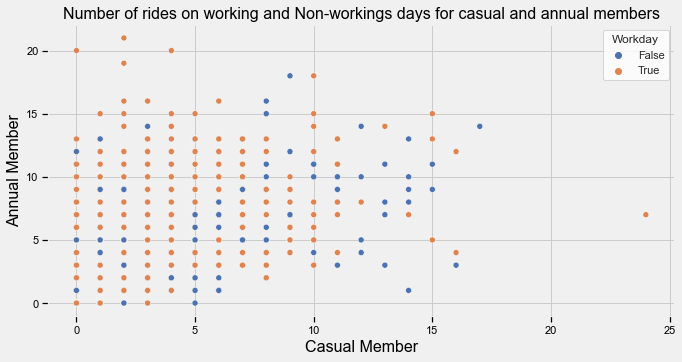

In [34]:
plt.figure(figsize =(10,5))
plt.title('Number of rides on working and Non-workings days for casual and annual members', fontsize = 16)
sns.set_theme(style="whitegrid")
ax = sns.scatterplot(data = daily_data_rides, x='Casual Member', y="Annual Member", hue="Workday")
plt.xlabel('Casual Member',  fontsize = 16 )
plt.ylabel('Annual Member',  fontsize = 16 )


While annual members use bikes throughout the workdays more, the casual members rides increases at the weekends.
for casual members, there is a clear trend for higher weekend usage and could well continue into the next years.

2- Violin plot for all number of rides

Text(0, 0.5, 'Rides Per Day')

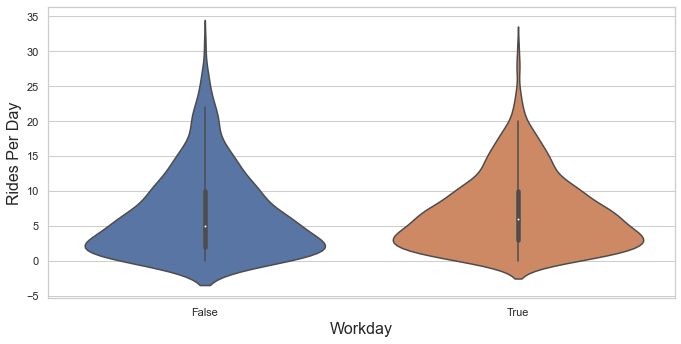

In [36]:
plt.figure(figsize =(10,5))
sns.set_theme(style="whitegrid")

ax = sns.violinplot(data = daily_data_rides, x = 'Workday' , y = 'rides')
plt.xlabel('Workday',fontsize = 16 )
plt.ylabel('Rides Per Day', fontsize = 16 )

3- Violin plot for annual member rides:

Text(0, 0.5, 'Annual member Rides Per Day')

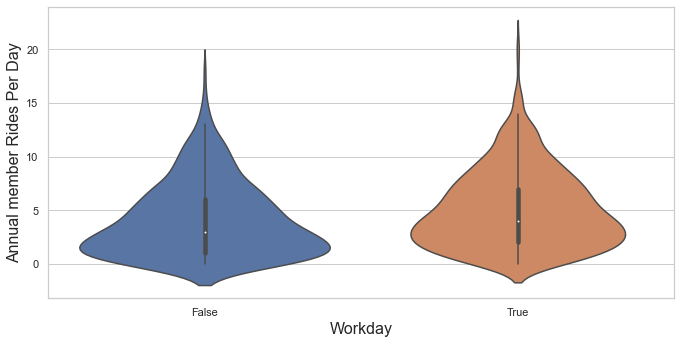

In [37]:
plt.figure(figsize =(10,5))
sns.set_theme(style="whitegrid")

ax = sns.violinplot(data = daily_data_rides, x = 'Workday' , y = 'Annual Member')
plt.xlabel('Workday',fontsize = 16 )
plt.ylabel('Annual member Rides Per Day', fontsize = 16 )

Annual member have a max of number of rides for workdays a bit more than weekedns, as well as a wider distribution of use for the greater number of rides.

4- Violin plot for casual member rides:

Text(0, 0.5, 'Casual member Rides Per Day')

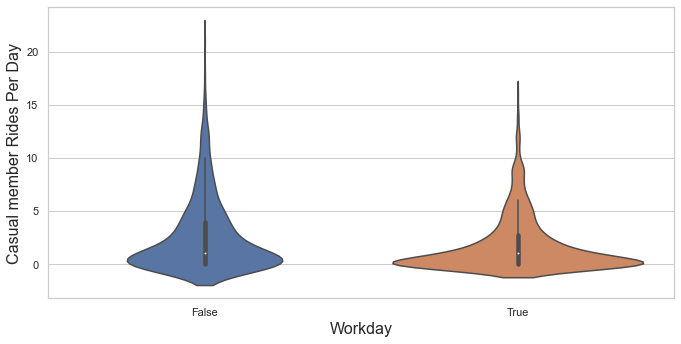

In [280]:
plt.figure(figsize =(10,5))
sns.set_theme(style="whitegrid")

ax = sns.violinplot(data = daily_data_rides, x = 'Workday' , y = 'Casual Member')
plt.xlabel('Workday',fontsize = 16 )
plt.ylabel('Casual member Rides Per Day', fontsize = 16 )

Casual members has less affect on overall rides, yet wider range of use for weekends.

OBSERVATION: Annual members were observed to use the service more often during weekdays, while more casual riders used the service during the weekends. In line with the prior observation of members possibly using the trips for commute to or from work, it was further noticed that the ridership by annual members was higher during the weekdays. The casual riders on the other hand were observed to make more trips during the weekends, indicating possible usage by families and tourists to explore the area. This also corroborates with the shorter average trip duration for annual members vs longer duration for casual riders. 

# 2- weather's impact on number of rides

In [40]:
# count the number of weather types
weather_df['Weather'].value_counts()

Clear                              37057
Rain                                2154
Snow                                1737
Fog                                 1430
Rain,Fog                             925
Haze                                 170
Moderate Rain,Fog                     97
Thunderstorms,Rain                    50
Moderate Rain                         42
Rain,Snow                             26
Thunderstorms                         25
Heavy Rain,Fog                        16
Moderate Snow                         16
Thunderstorms,Moderate Rain           12
Freezing Rain,Fog                     11
Thunderstorms,Heavy Rain,Fog          11
Heavy Snow                             7
Thunderstorms,Rain,Fog                 7
Thunderstorms,Moderate Rain,Fog        7
Freezing Rain                          5
Snow,Blowing Snow                      5
Freezing Rain,Snow                     4
Thunderstorms,Heavy Rain               4
Haze,Blowing Snow                      3
Thunderstorms,Fo

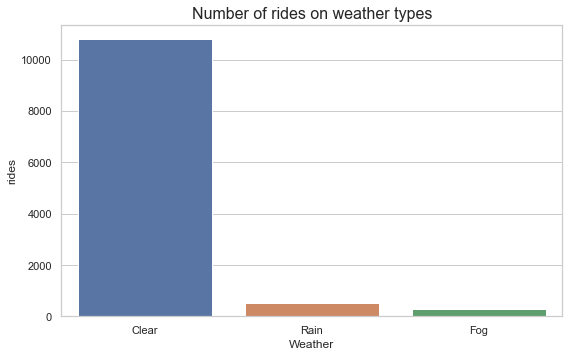

In [42]:
temp_df = hourly_ride_weather.groupby(['Weather']).sum().sort_values(by='rides', ascending = False).drop(
    columns={'Temp (°C)'}).reset_index()

plt.figure(figsize=(8,5))
plt.title('Number of rides on weather types', fontsize = 16)

ax= sns.barplot( x = temp_df["Weather"][0:3], y=temp_df["rides"][0:3])
plt.show()

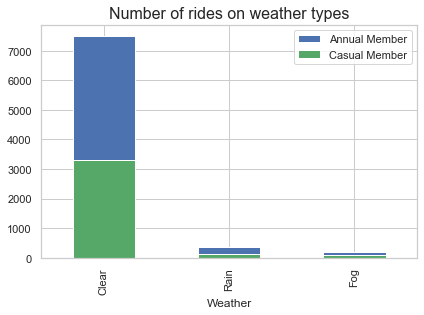

In [43]:
ax = temp_df[0:3].plot(x="Weather", y="Annual Member", kind="bar")
plt.title('Number of rides on weather types', fontsize = 16)
temp_df[0:3].plot(x="Weather", y="Casual Member", kind="bar", ax=ax, color="C2")

plt.show()

Text(0, 0.5, 'ANumber of rides')

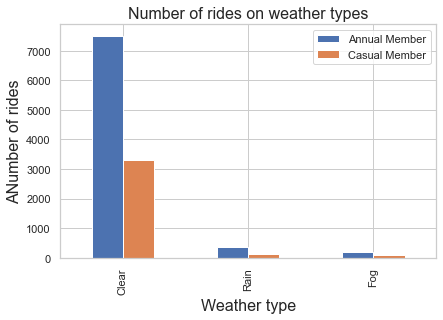

In [44]:
temp_compare = temp_df.loc[0:2]

temp_compare.plot(x= 'Weather', y=["Annual Member", "Casual Member"], kind="bar")
plt.title('Number of rides on weather types', fontsize = 16)

plt.xlabel('Weather type',fontsize = 16 )
plt.ylabel('ANumber of rides', fontsize = 16)

OBSERVATION: 
While majority of rides happen when there are no weather events (Clear weather type), rain seems the most common for riders to ride in compared to other events. Snow and fog weather conditions still have some amount of rides.

# Further compare the number of rides in clear and rain weather

For this purpose, "Clear" and "Rain" hours are extracted and resampled by day to compare number of rides in "clear hours of day" with number of rides in "Rain hours of day"

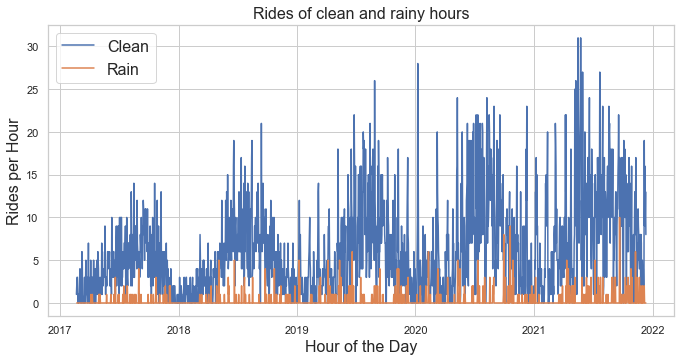

In [45]:
clear_hr_ofDay = hourly_ride_weather.loc[hourly_ride_weather['Weather']=='Clear'].resample('d').sum()
rain_hr_ofDay = hourly_ride_weather.loc[hourly_ride_weather['Weather']=='Rain'].resample('d').sum()

plt.figure(figsize =(10,5))
plt.title('Rides of clean and rainy hours', fontsize = 16)
sns.set_theme(style="whitegrid")

ax = sns.lineplot(x = clear_hr_ofDay.index, y = clear_hr_ofDay["rides"])
ax = sns.lineplot(x = rain_hr_ofDay.index, y = rain_hr_ofDay["rides"])
plt.xlabel('Hour of the Day',  fontsize = 16)
plt.ylabel('Rides per Hour', fontsize = 16)
#plt.xlim(0,24)
#plt.ylim(0,655)
plt.legend(['Clean', 'Rain'],  fontsize = 16)

For this purpose, "Clear" and "Rain" hours are extracted and resampled by week to compare number of rides in "clear hours of week" with number of rides in "Rain hours of week"

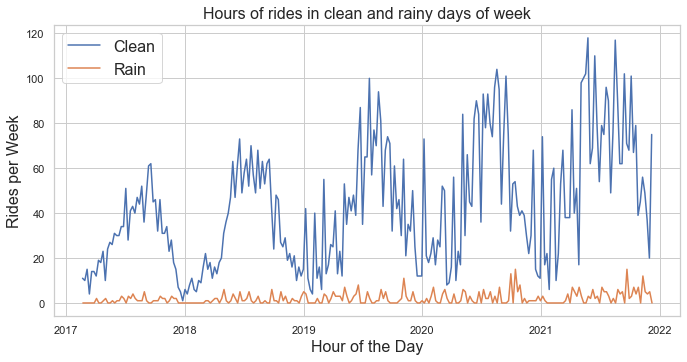

In [46]:
clear_hr_ofweek = hourly_ride_weather.loc[hourly_ride_weather['Weather']=='Clear'].resample('7d').sum()
rain_hr_ofweek = hourly_ride_weather.loc[hourly_ride_weather['Weather']=='Rain'].resample('7d').sum()

plt.figure(figsize =(10,5))
plt.title('Hours of rides in clean and rainy days of week', fontsize = 16)
sns.set_theme(style="whitegrid")

ax = sns.lineplot(x = clear_hr_ofweek.index, y = clear_hr_ofweek["rides"])
ax = sns.lineplot(x = rain_hr_ofweek.index, y = rain_hr_ofweek["rides"])
plt.xlabel('Hour of the Day',  fontsize = 16)
plt.ylabel('Rides per Week', fontsize = 16)
#plt.xlim(0,24)
#plt.ylim(0,655)
plt.legend(['Clean', 'Rain'],  fontsize = 16)

It is obvious from the previous discussions and figures that weather could be an important factor for creating a model to predict number of rides.

# 3- Tempratures's impact on the rides

An average daily tempreture could be a fiar factor for this comparison.

 1- Let's first disscuss about all number of rides:

Text(0, 0.5, 'Rides per day')

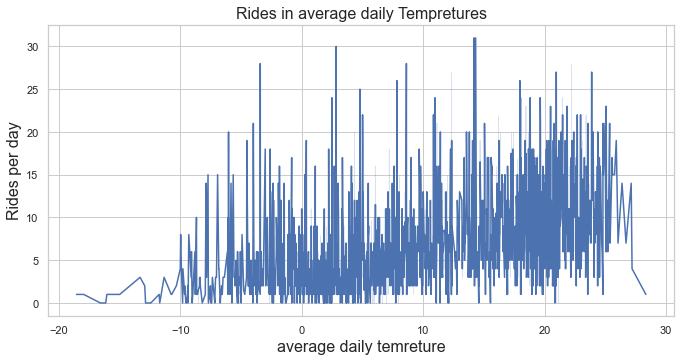

In [50]:
plt.figure(figsize =(10,5))
plt.title('Rides in average daily Tempretures', fontsize = 16)
sns.set_theme(style="whitegrid")

ax = sns.lineplot(x = daily_data_rides['Temp (°C)'], y = daily_data_rides["rides"])
plt.xlabel('average daily temreture',  fontsize = 16)
plt.ylabel('Rides per day', fontsize = 16)

In [54]:
### which kind of visualization could be better?

for weekly rides:

Text(0, 0.5, 'Rides per week')

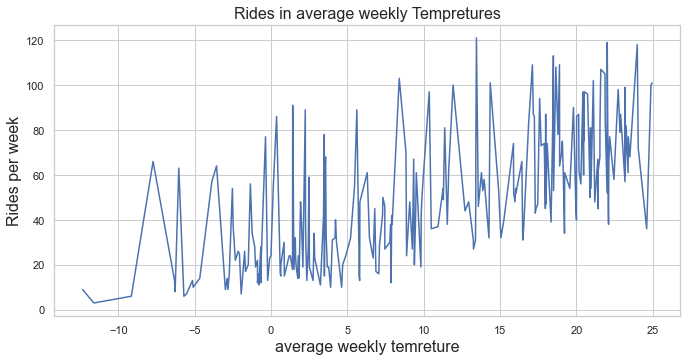

In [52]:
plt.figure(figsize =(10,5))
plt.title('Rides in average weekly Tempretures', fontsize = 16)
sns.set_theme(style="whitegrid")

ax = sns.lineplot(x = daily_data_rides.resample('7d')['Temp (°C)'].mean(), y = daily_data_rides.resample('7d')["rides"].sum())
plt.xlabel('average weekly temreture',  fontsize = 16)
plt.ylabel('Rides per week', fontsize = 16)

2- We can also compare annual and casual rides separately:

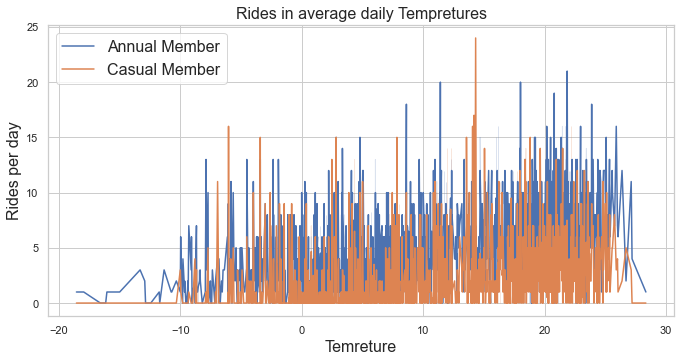

In [55]:
plt.figure(figsize =(10,5))
plt.title('Rides in average daily Tempretures', fontsize = 16)
sns.set_theme(style="whitegrid")

ax = sns.lineplot(x = daily_data_rides['Temp (°C)'], y = daily_data_rides["Annual Member"])
ax = sns.lineplot(x = daily_data_rides['Temp (°C)'], y = daily_data_rides["Casual Member"])
plt.xlabel('Temreture',  fontsize = 16)
plt.ylabel('Rides per day', fontsize = 16)

plt.legend(['Annual Member', 'Casual Member'],  fontsize = 16)

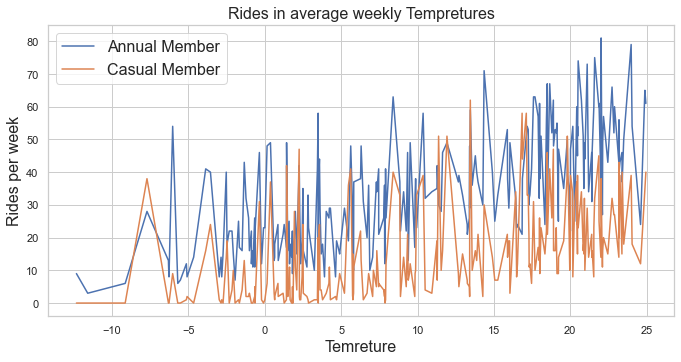

In [56]:
plt.figure(figsize =(10,5))
plt.title('Rides in average weekly Tempretures', fontsize = 16)
sns.set_theme(style="whitegrid")

ax = sns.lineplot(x = daily_data_rides.resample('7d')['Temp (°C)'].mean(), y = daily_data_rides.resample('7d')["Annual Member"].sum())
ax = sns.lineplot(x = daily_data_rides.resample('7d')['Temp (°C)'].mean(), y = daily_data_rides.resample('7d')["Casual Member"].sum())
plt.xlabel('Temreture',  fontsize = 16)
plt.ylabel('Rides per week', fontsize = 16)

plt.legend(['Annual Member', 'Casual Member'],  fontsize = 16)

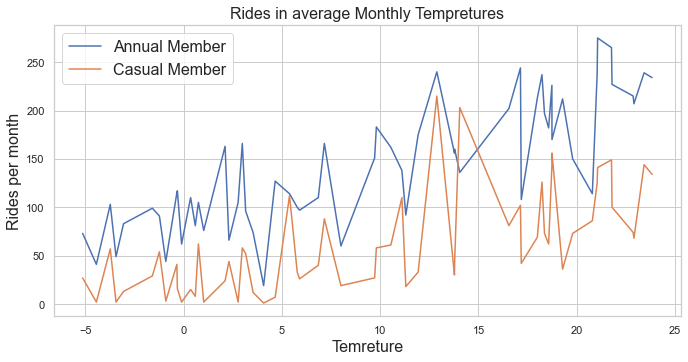

In [57]:
plt.figure(figsize =(10,5))
plt.title('Rides in average Monthly Tempretures', fontsize = 16)
sns.set_theme(style="whitegrid")

ax = sns.lineplot(x = daily_data_rides.resample('m')['Temp (°C)'].mean(), y = daily_data_rides.resample('m')["Annual Member"].sum())
ax = sns.lineplot(x = daily_data_rides.resample('m')['Temp (°C)'].mean(), y = daily_data_rides.resample('m')["Casual Member"].sum())
plt.xlabel('Temreture',  fontsize = 16)
plt.ylabel('Rides per month', fontsize = 16)

plt.legend(['Annual Member', 'Casual Member'],  fontsize = 16)

OBSERVATION:
we can find some ranges of tempretures that are more popular among riders.

3- Scatterplot:

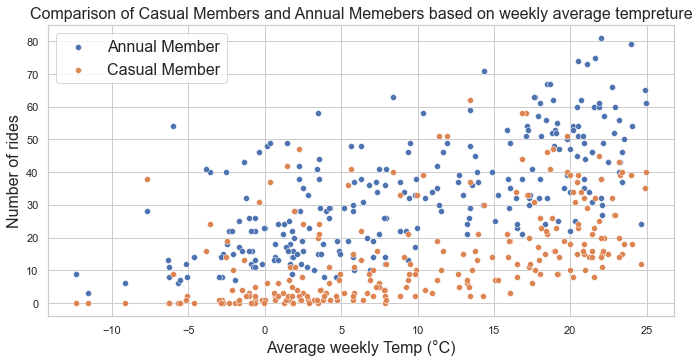

In [58]:
plt.figure(figsize =(10,5))
plt.title('Comparison of Casual Members and Annual Memebers based on weekly average tempreture', fontsize = 16)
sns.set_theme(style="whitegrid")
ax = sns.scatterplot(x = daily_data_rides.resample('7d')['Temp (°C)'].mean(), y=daily_data_rides.resample('7d')['Annual Member'].sum())
ax = sns.scatterplot(x = daily_data_rides.resample('7d')['Temp (°C)'].mean(), y=daily_data_rides.resample('7d')['Casual Member'].sum())

plt.xlabel('Average weekly Temp (°C)',  fontsize = 16 )
plt.ylabel('Number of rides',  fontsize = 16 )
plt.legend(['Annual Member','Casual Member'] , fontsize = 16 )

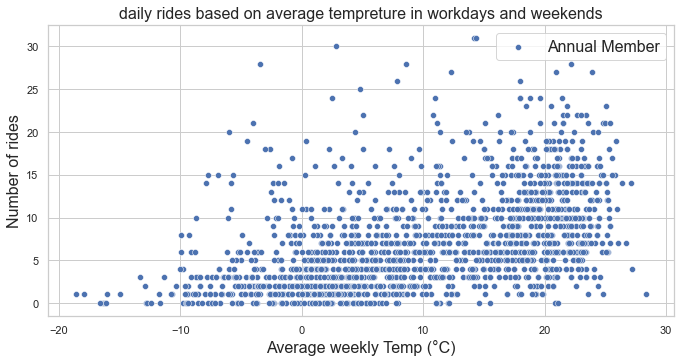

In [59]:
plt.figure(figsize =(10,5))
plt.title('daily rides based on average tempreture in workdays and weekends', fontsize = 16)
sns.set_theme(style="whitegrid")
ax = sns.scatterplot(x = daily_data_rides['Temp (°C)'] , y=daily_data_rides['rides'])
#ax = sns.scatterplot(x = daily_data_rides.resample('d')['Temp (°C)'].mean(), y=daily_data_rides.resample('7d')['Casual Member'].sum())

plt.xlabel('Average weekly Temp (°C)',  fontsize = 16 )
plt.ylabel('Number of rides',  fontsize = 16 )
plt.legend(['Annual Member','Casual Member'] , fontsize = 16 )

Text(0, 0.5, 'rides')

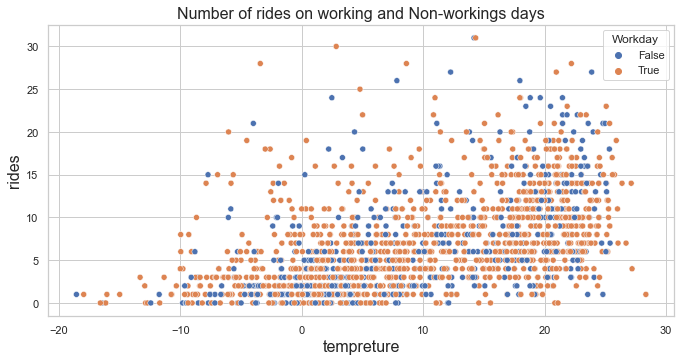

In [60]:
plt.figure(figsize =(10,5))
plt.title('Number of rides on working and Non-workings days', fontsize = 16)
sns.set_theme(style="whitegrid")
ax = sns.scatterplot(data = daily_data_rides, x='Temp (°C)', y="rides", hue="Workday")
plt.xlabel('tempreture',  fontsize = 16 )
plt.ylabel('rides',  fontsize = 16 )


In [ ]:
####### what type of plot will help to better visualize?/???

# Feature engineering and creating a model

Average tempreture, type of weather and weekday status are correlated with the number of rides. Now based on the described factors and their impact on the number of rides, we can choose two or three of them as features to create some machine learning models and then compare the models and their accuracy.